# Pymaceuticals Inc.

A study was conducted on 249 mice who were identified with SCC tumors.This analysis is mainly focused on 4 drug regimes given to mice.
# Analysis

1. The bar plot shows that more number of mice were treated with Capomulin drug (230 mouse), followed by Ramicane(228), probabily because they showed better results than others.On analysing the Capomulin treatment given to mouse ID l509,it was found the tumor volume  reduced with increasing timepoint.
2. From pie chart, it can be observed that among the mice that were used for the experiment, 50.6% were male and 49.8% were female.
3. Among the tested drug regimens, none of them had any potential outliers except for Infubinol.
4.A low standard error(0.12) found on regression plot shows  that the sample mean is closer to the population mean. The slope of the line shows that the x-axis and y-axs relationship is positive. However as not much datapoints are clustered around the line, the relationship is not strong.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')
# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice.
mice_number = len(combined_data['Mouse ID'].unique())
mice_number

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse =combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_info = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data=combined_data[combined_data['Mouse ID'].isin(duplicate_mouse)==False]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [51]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean=cleaned_data['Mouse ID'].nunique()
total_mice_clean

248

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
statistical_analysis = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_data = statistical_analysis.mean()
median_data = statistical_analysis.median()
variance_data = statistical_analysis.var()
std_dev_data = statistical_analysis.std()
sem_data = statistical_analysis.sem()
statistical_summary = pd.DataFrame({"Mean Tumor Volume":mean_data,
                                    "Median Tumor Volume" :median_data,
                                    "Tumor Volume Variance":variance_data,
                                    "Tumor Volume Std.Dev":std_dev_data,
                                    "Tumor Volume Std.Err":sem_data })
statistical_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# Group the data by 'Drug Regimen'

Aggregated_Summary_statistics = statistical_analysis.agg(
    mean='mean',                      
    median='median',                   
    variance='var',                    
    std_dev='std',                     
    sem='sem'                          
)

Aggregated_Summary_statistics


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

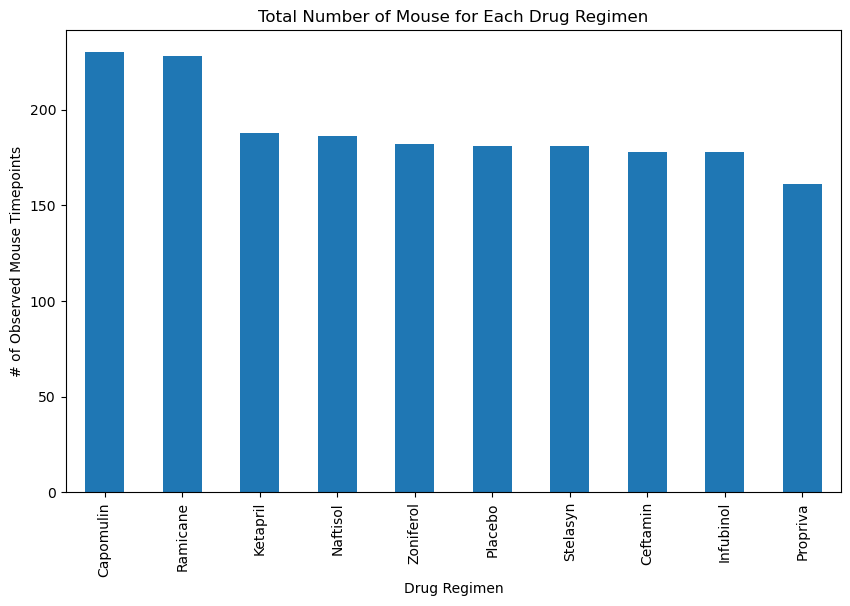

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Mouse_count = combined_data.groupby('Drug Regimen')['Timepoint'].count()
Mouse_count = Mouse_count.sort_values(ascending=False)
Mouse_count.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Mouse for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints")  
plt.show()


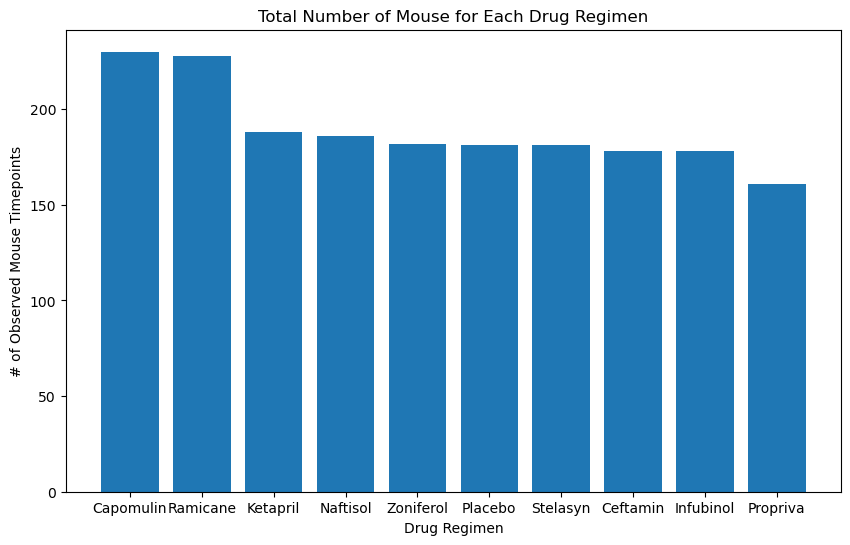

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mouse_count_py = combined_data.groupby('Drug Regimen')['Mouse ID'].count()
mouse_count_py = mouse_count_py.sort_values(ascending = False)
plt.figure(figsize=(10, 6))
plt.bar(mouse_count_py.index, mouse_count_py.values)
plt.title('Total Number of Mouse for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


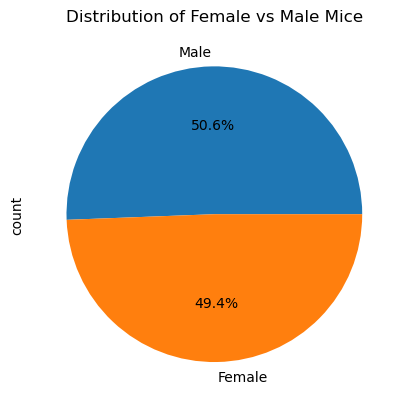

In [56]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
Gender_count = combined_data['Sex'].value_counts()
Gender_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()


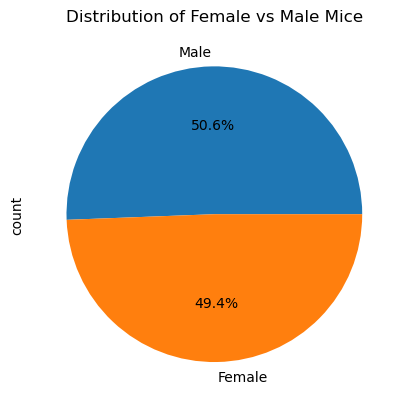

In [57]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
Gender_count_py = combined_data['Sex'].value_counts()
plt.pie(Gender_count_py, labels=Gender_count_py.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel("count")
plt.show()


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Exp_Drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

Greatest_timepoint = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(Greatest_timepoint, combined_data, how='left', on=['Mouse ID', 'Timepoint'])
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(Exp_Drug)]
final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543
...,...,...,...,...
239,y769,Ceftamin,45,68.594745
240,y793,Capomulin,45,31.896238
241,y865,Ceftamin,45,64.729837
245,z578,Ramicane,45,30.638696


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []
for treatment in treatments:

    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    tumor_vol_data.append(treatment_data)
    
    print(f"{treatment}'s potential outliers: {outliers}")
   

  


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\rince\AppData\Local\Temp\ipykernel_18440\710460416.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments)


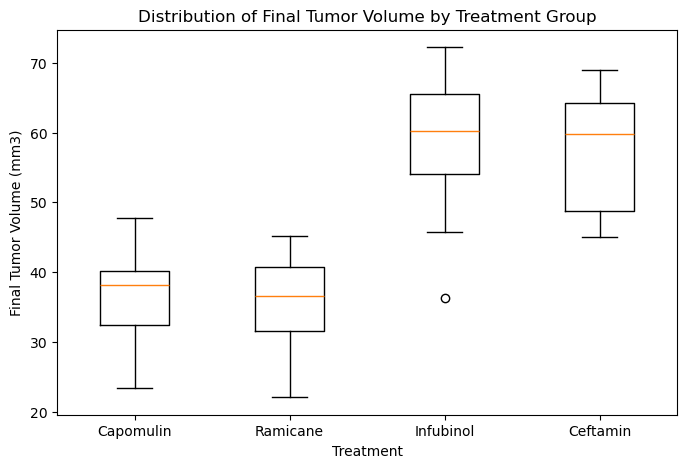

In [60]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8,5))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Distribution of Final Tumor Volume by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(False)
flierprops=dict(marker='o', facecolor='red', markersize=10)
plt.show()




## Line and Scatter Plots

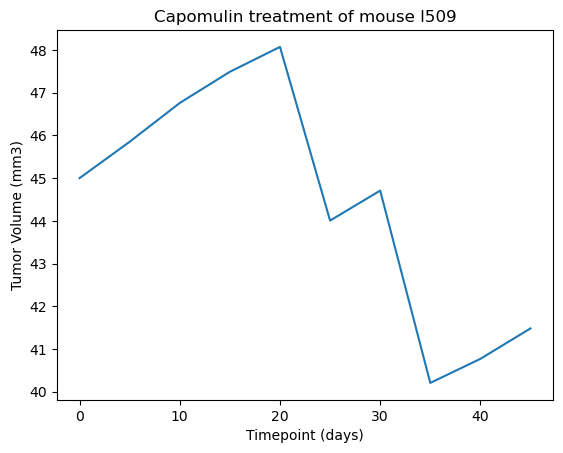

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_id = 'l509'
Drug_regimen = 'Capomulin'
mouse_info = combined_data[(combined_data['Mouse ID'] == Mouse_id) & (combined_data['Drug Regimen'] == Drug_regimen)]
plt.plot(mouse_info['Timepoint'],mouse_info['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"{Drug_regimen} treatment of mouse {Mouse_id}")
plt.show()

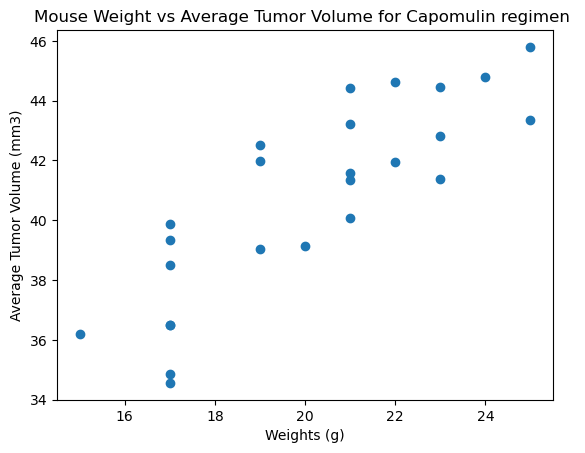

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_regimen = combined_data[combined_data['Drug Regimen']== 'Capomulin']
Avg_tumor_vol = Capomulin_regimen.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
weights = Capomulin_regimen.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(weights,Avg_tumor_vol,marker='o')
plt.xlabel("Weights (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin regimen ")
plt.show()

## Correlation and Regression

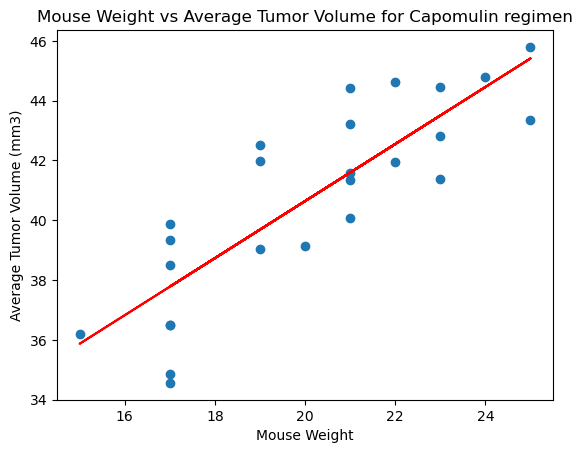

In [63]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor_coeff, _ = st.pearsonr(weights,Avg_tumor_vol)
slope,intercept, r_value, p_value, std_errr = st.linregress(weights, Avg_tumor_vol)
slope,intercept, r_value, p_value, std_errr
plt.scatter(weights,Avg_tumor_vol,marker ='o')
plt.plot(weights,slope * weights + intercept, color='red')
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()